# Data_Bootcamp_Final_Project

## Household Structure and Higher Education: An Analysis on The Impact of Childhood Living Arrangements on Attaining Higher Education

Cayley Boyd, Meetali Gupta, Angela Yang<br>
Data Bootcamp, Section 2 <br>
Fall 2018

## Abstract
Nature vs. Nurture - our environment has long been thought to have an effect on our success in life. We decided to explore the relationship between household structures of children growing up and their likelihood to attain higher education. To clarify, by "children" we are talking about young adults who are around the ages of 18/19 who are dependents finishing their last year of high school. Later, we look at young adults/adults who have received their Bachelor's and Associate Degrees. Looking at panel data across all 50 states, in addition the District of Columbia and Puerto Rico, across the years 2000-2017, we compared varying aspects of household structure with different levels of educational attainment on the state level. We were unable to draw a solid correlation between the two variables and suspect more influential ommitted variables are responsible for between-state differences in educational attainment.

## Set Up
### Importing Packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

### Retrieving Data 

We used the ACS Household Structure Data pulled from the Kids Count Data Center for the years 2000-2017 (with some data points omitted in this most recent year). We pulled data on both household structures and children's education levels.

In [15]:
# Data containing the household structure of various states in the US over several years
child_pop_household_type = pd.read_excel('C:/Users/meeta/Desktop/Data Bootcamp/Data/Child population by household type.xlsx')
child_neither_parent = pd.read_excel('C:/Users/meeta/Desktop/Data Bootcamp/Data/Children living with neither parent.xlsx')

# Data containing the education statistics of adults between 25 and 34 in various states in the US over different years 
edu_pop_25_to_34 = pd.read_excel('C:/Users/meeta/Desktop/Data Bootcamp/Data/Educational attainment of population ages 25 to 34.xlsx')

### Defining the Variables: Household Data

Child Population by Household Type <br>
Definition: Percent of total child  population in married-couple, father only, and mother only households.

Children living with Neither Parent<br>
Definition: The share of children under age 18 living in households where neither parent resides.

### Defining the Variables: Education Data

Educational Attainment of population ages 25-34<br>
Definition: The share of all adults ages 25 to 34 by educational attainment.

### Cleaning the child_pop_household_type and child_neither_parent datasets

In [16]:
## Cleaning the child_pop_household_type data

# making location the index 
child_pop_household_type_new = child_pop_household_type.set_index(['Location'])

# dropping the fields with United States with them
child_pop_household_type_new = child_pop_household_type_new.drop(['United States'])

# dropping N.A
child_pop_household_type_new = child_pop_household_type_new[child_pop_household_type_new.Data != 'N.A.']

# dropping the fields with Number in them 
child_pop_household_type_new = child_pop_household_type_new[child_pop_household_type_new.DataFormat != 'Number']

# dropping the DataFormat field
child_pop_household_type_new = child_pop_household_type_new.drop(['DataFormat'], axis = 1)


In [17]:
## Cleaning the child_neither_parent data using the same process as that of child_pop_household_type data 

child_neither_parent_new = child_neither_parent.set_index(['Location'])
child_neither_parent_new = child_neither_parent_new.drop(['United States'])
child_neither_parent_new = child_neither_parent_new[child_neither_parent_new.Data != 'N.A.']
child_neither_parent_new = child_neither_parent_new[child_neither_parent_new.DataFormat != 'Number']
child_neither_parent_new = child_neither_parent_new.drop(['DataFormat'], axis = 1)

#Creating a list for the child_neither_parent data 
Household_Type = []
for i in range(879):
    Household_Type.append('Neither parent Households')

#Adding the Household_Type list to the child_neither_parent_new data
child_neither_parent_new['Household Type'] = Household_Type

##Changing the order of columns 
child_neither_parent_new = child_neither_parent_new[['Household Type','TimeFrame', 'Data']]

In [18]:
## Combining the child_pop_household_type and child_neither_parent_new datasets together 
Household_structure = child_pop_household_type_new.append(child_neither_parent_new)

## Reseting the index
Household_structure = Household_structure.reset_index()

## Changing the string type to float type 
Household_structure['Data'] = pd.to_numeric(Household_structure['Data'], errors = 'coerce')

In [19]:
Household_structure

,Location,Household Type,TimeFrame,Data
0,Washington,Mother only Households,2008,0.20
1,Montana,Married-couple Households,2000,0.77
2,Montana,Father only Households,2000,0.08
3,Montana,Mother only Households,2000,0.15
4,South Carolina,Married-couple Households,2011,0.59
5,South Carolina,Father only Households,2011,0.07
6,South Carolina,Mother only Households,2011,0.33
7,South Carolina,Father only Households,2012,0.07
8,South Carolina,Married-couple Households,2012,0.59
9,South Carolina,Mother only Households,2012,0.34


### Cleaning the edu_pop_25_to_34 dataset

In [20]:
## Cleaning the edu_pop_25_to_34_new
edu_pop_25_to_34_new = edu_pop_25_to_34.set_index(['Location'])
edu_pop_25_to_34_new = edu_pop_25_to_34_new.drop(['United States'])
edu_pop_25_to_34_new = edu_pop_25_to_34_new[edu_pop_25_to_34_new.DataFormat != 'Number']
edu_pop_25_to_34_new = edu_pop_25_to_34_new.drop(['DataFormat'], axis = 1)
edu_pop_25_to_34_new = edu_pop_25_to_34_new.reset_index()

In [21]:
edu_pop_25_to_34_new

,Location,Education,TimeFrame,Data
0,Alabama,Not a high school graduate,2000,0.17
1,Alabama,High school diploma or GED,2000,0.52
2,Alabama,Associate's Degree,2000,0.08
3,Alabama,Bachelor's Degree,2000,0.18
4,Alabama,Graduate degree,2000,0.05
5,Alabama,Not a high school graduate,2001,0.14
6,Alabama,High school diploma or GED,2001,0.56
7,Alabama,Associate's Degree,2001,0.08
8,Alabama,Bachelor's Degree,2001,0.17
9,Alabama,Graduate degree,2001,0.05


### Merging the Household_structure and edu_pop_25_to_34_new datasets for years 2000, 2005, 2010 and 2015

In [22]:
## Selecting four years - 2000, 2005, 2010 and 2015 from the Household_structure and edu_pop_25_to_34_new
## datasets and then combining the two datasets for the year and making a pivot table 

# Selecting the years for the Household_structure data  
House_2000 = Household_structure.loc[Household_structure['TimeFrame'] == 2000].drop(['TimeFrame'], axis = 1)
House_2005 = Household_structure.loc[Household_structure['TimeFrame'] == 2005].drop(['TimeFrame'], axis = 1)
House_2010 = Household_structure.loc[Household_structure['TimeFrame'] == 2010].drop(['TimeFrame'], axis = 1)
House_2015 = Household_structure.loc[Household_structure['TimeFrame'] == 2015].drop(['TimeFrame'], axis = 1)

# Making a pivot table for the Household_structure datatsets 
H_Pivot_2000 = House_2000.pivot_table(index = 'Location', columns = 'Household Type')
H_Pivot_2005 = House_2005.pivot_table(index = 'Location', columns = 'Household Type')
H_Pivot_2010 = House_2010.pivot_table(index = 'Location', columns = 'Household Type')
H_Pivot_2015 = House_2015.pivot_table(index = 'Location', columns = 'Household Type')

# Selecting the years for the edu_pop_25_to_34_new data  
Edu_2000 = edu_pop_25_to_34_new.loc[edu_pop_25_to_34_new['TimeFrame'] == 2000].drop(['TimeFrame'], axis = 1)
Edu_2005 = edu_pop_25_to_34_new.loc[edu_pop_25_to_34_new['TimeFrame'] == 2005].drop(['TimeFrame'], axis = 1)
Edu_2010 = edu_pop_25_to_34_new.loc[edu_pop_25_to_34_new['TimeFrame'] == 2010].drop(['TimeFrame'], axis = 1)
Edu_2015 = edu_pop_25_to_34_new.loc[edu_pop_25_to_34_new['TimeFrame'] == 2015].drop(['TimeFrame'], axis = 1)

# Making a pivot table for the edu_pop_25_to_34_new datasets
E_Pivot_2000 = Edu_2000.pivot_table(index = 'Location', columns = 'Education')
E_Pivot_2005 = Edu_2005.pivot_table(index = 'Location', columns = 'Education')
E_Pivot_2010 = Edu_2010.pivot_table(index = 'Location', columns = 'Education')
E_Pivot_2015 = Edu_2015.pivot_table(index = 'Location', columns = 'Education')

In [23]:
## Merging the Household_structure and edu_pop_25_to_34_new datasets for the four years 
Merge_2000 = pd.merge(H_Pivot_2000,E_Pivot_2000, on = 'Location', how = 'inner')
Merge_2005 = pd.merge(H_Pivot_2005,E_Pivot_2005, on = 'Location', how = 'inner')
Merge_2010 = pd.merge(H_Pivot_2010,E_Pivot_2010, on = 'Location', how = 'inner')
Merge_2015 = pd.merge(H_Pivot_2015,E_Pivot_2015, on = 'Location', how = 'inner')

In [24]:
## Cleaning the pivot tables 

# removing the data field on the top
Merge_2000.columns = Merge_2000.columns.droplevel(0)
Merge_2000 = Merge_2000.reset_index().rename_axis(None, axis = 1)

# renaming the columns 
Merge_2000.columns = Merge_2000.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("'", "").str.replace("-","_")

# Repeating the cleaning process with the datasets from the other years
Merge_2005.columns = Merge_2005.columns.droplevel(0)
Merge_2005 = Merge_2005.reset_index().rename_axis(None, axis = 1)
Merge_2005.columns = Merge_2005.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("'", "").str.replace("-","_")

Merge_2010.columns = Merge_2010.columns.droplevel(0)
Merge_2010 = Merge_2010.reset_index().rename_axis(None, axis = 1)
Merge_2010.columns = Merge_2010.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("'", "").str.replace("-","_")

Merge_2015.columns = Merge_2015.columns.droplevel(0)
Merge_2015 = Merge_2015.reset_index().rename_axis(None, axis = 1)
Merge_2015.columns = Merge_2015.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("'", "").str.replace("-","_")

In [25]:
Merge_2000

,location,father_only_households,married_couple_households,mother_only_households,neither_parent_households,associates_degree,bachelors_degree,graduate_degree,high_school_diploma_or_ged,not_a_high_school_graduate
0,Alabama,0.07,0.61,0.31,0.08,0.08,0.18,0.05,0.52,0.17
1,Alaska,0.07,0.69,0.22,0.06,0.07,0.18,0.04,0.62,0.09
2,Arizona,0.08,0.68,0.23,0.05,0.07,0.17,0.06,0.51,0.20
3,Arkansas,0.05,0.64,0.31,0.07,0.05,0.16,0.04,0.61,0.16
4,California,0.07,0.70,0.22,0.07,0.07,0.20,0.08,0.42,0.24
5,Colorado,0.05,0.75,0.19,0.04,0.06,0.27,0.08,0.46,0.12
6,Connecticut,0.05,0.74,0.21,0.04,0.08,0.26,0.11,0.44,0.11
7,Delaware,0.06,0.66,0.27,0.06,0.07,0.22,0.08,0.55,0.09
8,District of Columbia,0.06,0.34,0.60,0.11,0.03,0.29,0.22,0.34,0.11
9,Florida,0.07,0.63,0.29,0.09,0.09,0.18,0.06,0.52,0.16


In [26]:
Merge_2005

,location,father_only_households,married_couple_households,mother_only_households,neither_parent_households,associates_degree,bachelors_degree,graduate_degree,high_school_diploma_or_ged,not_a_high_school_graduate
0,Alabama,0.06,0.64,0.30,0.08,0.08,0.18,0.06,0.52,0.16
1,Alaska,0.09,0.70,0.21,0.07,0.09,0.16,0.07,0.61,0.07
2,Arizona,0.08,0.68,0.24,0.07,0.08,0.17,0.06,0.51,0.18
3,Arkansas,0.07,0.66,0.27,0.07,0.06,0.16,0.05,0.58,0.15
4,California,0.08,0.71,0.22,0.06,0.07,0.21,0.08,0.44,0.20
5,Colorado,0.07,0.73,0.19,0.05,0.08,0.27,0.09,0.42,0.13
6,Connecticut,0.05,0.71,0.24,0.05,0.06,0.25,0.14,0.45,0.10
7,Delaware,0.07,0.66,0.26,0.06,0.06,0.21,0.11,0.51,0.12
8,District of Columbia,0.08,0.36,0.56,0.09,0.03,0.31,0.25,0.31,0.11
9,Florida,0.07,0.65,0.28,0.07,0.10,0.19,0.07,0.50,0.14


In [27]:
Merge_2010

,location,father_only_households,married_couple_households,mother_only_households,neither_parent_households,associates_degree,bachelors_degree,graduate_degree,high_school_diploma_or_ged,not_a_high_school_graduate
0,Alabama,0.07,0.61,0.32,0.06,0.07,0.18,0.07,0.51,0.17
1,Alaska,0.09,0.69,0.21,0.05,0.09,0.19,0.06,0.59,0.08
2,Arizona,0.09,0.64,0.26,0.06,0.09,0.18,0.06,0.52,0.15
3,Arkansas,0.07,0.62,0.30,0.07,0.08,0.17,0.06,0.56,0.13
4,California,0.08,0.68,0.23,0.05,0.07,0.22,0.08,0.45,0.17
5,Colorado,0.08,0.70,0.22,0.04,0.08,0.27,0.09,0.45,0.11
6,Connecticut,0.06,0.68,0.25,0.04,0.06,0.25,0.14,0.44,0.11
7,Delaware,0.08,0.64,0.27,0.05,0.07,0.21,0.10,0.48,0.14
8,District of Columbia,0.08,0.41,0.50,0.07,0.03,0.35,0.31,0.24,0.07
9,Florida,0.08,0.61,0.30,0.05,0.10,0.18,0.07,0.50,0.14


In [28]:
Merge_2015

,location,father_only_households,married_couple_households,mother_only_households,neither_parent_households,associates_degree,bachelors_degree,graduate_degree,high_school_diploma_or_ged,not_a_high_school_graduate
0,Alabama,0.06,0.61,0.32,0.07,0.08,0.19,0.07,0.53,0.13
1,Alaska,0.11,0.67,0.21,0.05,0.09,0.22,0.07,0.56,0.07
2,Arizona,0.10,0.63,0.27,0.06,0.09,0.19,0.07,0.51,0.13
3,Arkansas,0.08,0.64,0.27,0.08,0.08,0.17,0.07,0.56,0.11
4,California,0.09,0.68,0.23,0.04,0.08,0.24,0.10,0.45,0.13
5,Colorado,0.08,0.73,0.19,0.04,0.09,0.29,0.11,0.44,0.08
6,Connecticut,0.06,0.68,0.25,0.04,0.07,0.28,0.15,0.42,0.08
7,Delaware,0.07,0.61,0.31,0.05,0.07,0.22,0.11,0.48,0.12
8,District of Columbia,0.07,0.47,0.45,0.07,0.02,0.35,0.37,0.21,0.05
9,Florida,0.09,0.60,0.30,0.06,0.12,0.21,0.08,0.49,0.10


### Limitations with the Data
Given that our investigating question sought to explore effects over a sustained time period, our data is not a perfect fit for our topic. However, given the sensitivity of child-related data on an individual level, we decided that exploring our question on a more aggregate level (state-specific) would be an effective way to test our hypothesis. <br>

We also face challenges regarding inconsistencies in the data. Namely, that the data over the 17 year time-span captures the 50 most populous cities (and Puerto Rico and District of Columbia) of any given year, meaning that there is the possibility that different cities are accounted for in different years. Because the state-level data is an average, the percentages within a state do not always add up to 100%.

### Regression Analysis

In [29]:
## Running a regression for Merge_2000
print(smf.ols("high_school_diploma_or_ged~father_only_households+married_couple_households+mother_only_households+neither_parent_households", data = Merge_2000).fit().summary())

                                OLS Regression Results                                
Dep. Variable:     high_school_diploma_or_ged   R-squared:                       0.209
Model:                                    OLS   Adj. R-squared:                  0.140
Method:                         Least Squares   F-statistic:                     3.031
Date:                        Fri, 21 Dec 2018   Prob (F-statistic):             0.0267
Time:                                01:08:53   Log-Likelihood:                 80.140
No. Observations:                          51   AIC:                            -150.3
Df Residuals:                              46   BIC:                            -140.6
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

From the Merge_2000 dataset, we see that the R-squared is very low, at only 20.9%. 
It is interesting too how the only statistically significant relationships seems to be with married and mother-only households, and those relationships are negative. Strictly looking at coefficients, the only positive coefficient belongs to the neither-parent households. This contradicts our hypothesis the most, as it indicates the least stable family structure.

In [30]:
## Running a regression for Merge_2005
print(smf.ols("high_school_diploma_or_ged~father_only_households+married_couple_households+mother_only_households+neither_parent_households", data = Merge_2005).fit().summary())

                                OLS Regression Results                                
Dep. Variable:     high_school_diploma_or_ged   R-squared:                       0.442
Model:                                    OLS   Adj. R-squared:                  0.394
Method:                         Least Squares   F-statistic:                     9.303
Date:                        Fri, 21 Dec 2018   Prob (F-statistic):           1.27e-05
Time:                                01:08:56   Log-Likelihood:                 90.143
No. Observations:                          52   AIC:                            -170.3
Df Residuals:                              47   BIC:                            -160.5
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

The Merge_2005 data has vastly more explaining power, with an R-squared of 44.2%; however none of the variables appear statistically significant beyond neither-parent households (which is again a positive coefficient). It appears that in the span of 5 years, this coefficient has notably strengthened.

In [31]:
## Running a regression for Merge_2010
print(smf.ols("high_school_diploma_or_ged~father_only_households+married_couple_households+mother_only_households+neither_parent_households", data = Merge_2010).fit().summary())

                                OLS Regression Results                                
Dep. Variable:     high_school_diploma_or_ged   R-squared:                       0.475
Model:                                    OLS   Adj. R-squared:                  0.431
Method:                         Least Squares   F-statistic:                     10.65
Date:                        Fri, 21 Dec 2018   Prob (F-statistic):           3.17e-06
Time:                                01:08:58   Log-Likelihood:                 87.535
No. Observations:                          52   AIC:                            -165.1
Df Residuals:                              47   BIC:                            -155.3
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In the Merge_2010 data, the R-squared is similarly high at 47.5%, and once again neither-parents is the only significant coefficient. It has grown since 2005 and is still positive.

In [32]:
## Running a regression for Merge_2015
print(smf.ols("high_school_diploma_or_ged~father_only_households+married_couple_households+mother_only_households+neither_parent_households", data = Merge_2015).fit().summary())

                                OLS Regression Results                                
Dep. Variable:     high_school_diploma_or_ged   R-squared:                       0.306
Model:                                    OLS   Adj. R-squared:                  0.247
Method:                         Least Squares   F-statistic:                     5.190
Date:                        Fri, 21 Dec 2018   Prob (F-statistic):            0.00152
Time:                                01:09:01   Log-Likelihood:                 81.355
No. Observations:                          52   AIC:                            -152.7
Df Residuals:                              47   BIC:                            -143.0
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

The Merge_2015 dataset shows a decrease in the R-squared to 30.6%. Neither-parent household is still a positive, significant coefficient.

### Determining the Most and Least Educated States

In [33]:
## grouping the edu_pop_25_to_34_new data by the education type for all the years from 2000 to 2017 and 
## then taking the average percentage of education level in different states over the years. 

# grouping the edu_pop_25_to_34_new data by not a high school graduate education level and taking the average
no_highschool_avg = edu_pop_25_to_34_new.loc[(edu_pop_25_to_34_new['Education'].str.contains('Not a high school graduate'))]
no_highschool_avg = no_highschool_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

# repeating the grouping part for other education levels 
high_school_avg = edu_pop_25_to_34_new.loc[(edu_pop_25_to_34_new['Education'].str.contains('High school diploma or GED'))]
high_school_avg = high_school_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

associate_avg = edu_pop_25_to_34_new.loc[(edu_pop_25_to_34_new['Education'].str.contains("Associate's Degree"))]
associate_avg = associate_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

bachelor_avg = edu_pop_25_to_34_new.loc[(edu_pop_25_to_34_new['Education'].str.contains("Bachelor's Degree"))]
bachelor_avg = bachelor_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

grad_avg = edu_pop_25_to_34_new.loc[(edu_pop_25_to_34_new['Education'].str.contains('Graduate degree'))]
grad_avg = grad_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

In [34]:
## sorting the data from highest to lowest and finding the state with the highest and the lowest percentage of 
## adults who are not high school graduates 
no_highschool_avg = no_highschool_avg.sort_values('Data', ascending = False)
print(no_highschool_avg.head(1)) ## gives us Texas
print(no_highschool_avg.tail(1)) ## gives us North Dakota

## repeating the sorting part for other education levels 
high_school_avg = high_school_avg.sort_values('Data', ascending = False)
print(high_school_avg.head(1)) ## gives us Alaska
print(high_school_avg.tail(1)) ## gives us District of Columbia 

associate_avg = associate_avg.sort_values('Data', ascending = False)
print(associate_avg.head(1)) ## gives us North Dakota 
print(associate_avg.tail(1)) ## gives us District of Columbia 

bachelor_avg = bachelor_avg.sort_values('Data', ascending = False)
print(bachelor_avg.head(1)) ## gives us District of Columbia 
print(bachelor_avg.tail(1)) ## gives us New Mexico

grad_avg = grad_avg.sort_values('Data', ascending = False)
print(grad_avg.head(1)) ## gives us District of Columbia 
print(grad_avg.tail(1)) ## gives us Nevada

          TimeFrame      Data
Location                     
Texas        2008.5  0.178333
              TimeFrame      Data
Location                         
North Dakota     2008.5  0.043889
          TimeFrame      Data
Location                     
Alaska       2008.5  0.603889
                      TimeFrame      Data
Location                                 
District of Columbia     2008.5  0.258889
              TimeFrame      Data
Location                         
North Dakota     2008.5  0.148889
                      TimeFrame      Data
Location                                 
District of Columbia     2008.5  0.024444
                      TimeFrame      Data
Location                                 
District of Columbia     2008.5  0.328889
            TimeFrame      Data
Location                       
New Mexico     2008.5  0.151111
                      TimeFrame      Data
Location                                 
District of Columbia     2008.5  0.304444
          TimeFr

### State-Specific Analyses
We sought to look more closely at states that seemed to be the top/bottom of each educational attainment standard (Not high school graduate, high school diploma, Associate's, Bachelor's, Graduate)
To do this, we averaged accross the entire time period (2000-2017) and averaged the data points related to each educational attainment level on a state level.

In [35]:
## Showing the states with the highest and the lowest percentage of different education levels

select_state_degree = pd.DataFrame({ "Education Level": ["No_highschool", "High_school_diploma_or_GED","Associates", "Bachelors", "Graduate"],
                            "Highest_percentage_state": ['Texas', 'Alaska', 'North Dakota', 'District of Columbia', 'District of Columbia'], 
                            "Lowest_percentage_state": ['North Dakota', "District of Columbia", "District of Columbia", "New Mexico", "Nevada"]})
select_state_degree

,Education Level,Highest_percentage_state,Lowest_percentage_state
0,No_highschool,Texas,North Dakota
1,High_school_diploma_or_GED,Alaska,District of Columbia
2,Associates,North Dakota,District of Columbia
3,Bachelors,District of Columbia,New Mexico
4,Graduate,District of Columbia,Nevada


As we can see with the table above, our hypothesis is essentially disproven, as the District of Columbia has the highest numbers of Bachelors/Graduate degrees and one of the lowest percentages of married-family households. <br>
We believed that the stability of married-family househoulds would have a significant effect on influencing children to attain higher education. However, it appears that state-related factors (potentially region-specific occupations, religion, and other ommitted variables) must be responsibly for the distribution of educational attainment levels.<br>

One important note is that our initial investigation of using High-School Diploma as a proxy for educational attainment was not effective for several reasons. Firstly, High-school Diploma did not include the percentage of people who attained education beyond a high-school diploma. A better proxy would have been the No High-school Diploma group, as this was an inclusive population of indviduals who did not finish high-school or anything beyond it.

In [41]:
## Selecting the states of Alaska, District of Columbia, Nevada, New Mexico, North Dakota and Texas 
## and finding out the average household structure of those states over the years  

Alaska_edu = Household_structure.loc[(Household_structure['Location'].str.contains('Alaska'))]
Alaska_edu = Alaska_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

Columbia_edu = Household_structure.loc[(Household_structure['Location'].str.contains('District of Columbia'))]
Columbia_edu = Columbia_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

New_Mexico_edu = Household_structure.loc[(Household_structure['Location'].str.contains('New Mexico'))]
New_Mexico_edu = New_Mexico_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

Nevada_edu = Household_structure.loc[(Household_structure['Location'].str.contains('Nevada'))]
Nevada_edu = Nevada_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

North_Dakota_edu = Household_structure.loc[(Household_structure['Location'].str.contains('North Dakota'))]
North_Dakota_edu = North_Dakota_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

Texas_edu = Household_structure.loc[(Household_structure['Location'].str.contains('Texas'))]
Texas_edu = Texas_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})


In [42]:
## Showing the household structure of the different states 

# Merging the state_edu datasets for different states to be combined 
merge1 = pd.merge(Alaska_edu, Columbia_edu, on ='Household Type', how = 'inner')
merge2 = pd.merge(New_Mexico_edu, Nevada_edu,on ='Household Type', how = 'inner' )
merge3 = pd.merge(North_Dakota_edu, Texas_edu,on ='Household Type', how = 'inner') 
merge4 = pd.merge(merge1,merge2, on ='Household Type', how = 'inner')
select_state_household = pd.merge(merge4,merge3, on ='Household Type', how = 'inner')

# Cleaning the select_state_household dataset
select_state_household = select_state_household.drop(columns = ['TimeFrame_x_x', 'TimeFrame_y_x', 'TimeFrame_x_y', 'TimeFrame_y_y', 'TimeFrame_x', 'TimeFrame_y'], axis = 1)
select_state_household = select_state_household.rename(index = str, columns = {"Data_x_x": "Alaska", "Data_y_x": "Columbia", "Data_x_y": "New Mexico", "Data_y_y": "Nevada", "Data_x": "North Dakota", "Data_y": "Texas" })
select_state_household = select_state_household.transpose()
select_state_household

Household Type,Father only Households,Married-couple Households,Mother only Households,Neither parent Households
Alaska,0.091667,0.692222,0.206111,0.058235
Columbia,0.077222,0.401111,0.515000,0.085882
New Mexico,0.093889,0.615556,0.285556,0.062941
Nevada,0.091111,0.655000,0.244444,0.058235
North Dakota,0.069444,0.742778,0.178333,0.040588
Texas,0.062778,0.678333,0.251111,0.055882


In [43]:
## Making a dataset for Alaska and District of Columbia to understand the household structure trends in the two states 
## for years from 2000 to 2017. Alaska and District of Columbia have been specifically chosen because the states 
## have the highest and the lowest percentage of high school graduates respectively 

# Dataset for Alaska 
Alaska_household = Household_structure.loc[Household_structure['Location'].str.contains('Alaska')]

# dropping location and making a pivot table 
Alaska_household = Alaska_household.drop(['Location'], axis = 1)
Alaska_household = Alaska_household.pivot_table(index = 'TimeFrame', columns = 'Household Type')

# removing the data field on the top
Alaska_household.columns = Alaska_household.columns.droplevel(0)
Alaska_household = Alaska_household.reset_index().rename_axis(None, axis = 1)

# renaming the columns 
Alaska_household.columns = Alaska_household.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-","_")

#assigning the year as index 
Alaska_household = Alaska_household.set_index(['timeframe'])

# Repeating the process for District of Columbia 
Columbia_household = Household_structure.loc[Household_structure['Location'].str.contains('District of Columbia')]
Columbia_household = Columbia_household.drop(['Location'], axis = 1)
Columbia_household = Columbia_household.pivot_table(index = 'TimeFrame', columns = 'Household Type')
Columbia_household.columns = Columbia_household.columns.droplevel(0)
Columbia_household = Columbia_household.reset_index().rename_axis(None, axis = 1)
Columbia_household.columns = Columbia_household.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-","_")
Columbia_household = Columbia_household.set_index(['timeframe'])

In [44]:
## Making a dataset for Alaska and District of Columbia to understand the education level trends in the two states 
## for years from 2000 to 2017. Alaska and District of Columbia have been specifically chosen because the states 
## have the highest and the lowest percentage of high school graduates respectively 

## Making a dataset for Alaska and cleaning it 
Alaska_education = edu_pop_25_to_34_new.loc[edu_pop_25_to_34_new['Location'].str.contains('Alaska')]

# dropping location and making a pivot table 
Alaska_education = Alaska_education.drop(['Location'], axis = 1)
Alaska_education = Alaska_education.pivot_table(index = 'TimeFrame', columns = 'Education')

# reseting the index 
Alaska_education.columns = Alaska_education.columns.droplevel(0)
Alaska_education = Alaska_education.reset_index().rename_axis(None, axis = 1)

# renaming the columns 
Alaska_education.columns = Alaska_education.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-","_").str.replace("'", "")

# reseting the index 
Alaska_education = Alaska_education.set_index(['timeframe'])

# Repeating the process for District of Columbia 
Columbia_education = edu_pop_25_to_34_new.loc[edu_pop_25_to_34_new['Location'].str.contains('District of Columbia')]
Columbia_education = Columbia_education.drop(['Location'], axis = 1)
Columbia_education = Columbia_education.pivot_table(index = 'TimeFrame', columns = 'Education')
Columbia_education.columns = Columbia_education.columns.droplevel(0)
Columbia_education = Columbia_education.reset_index().rename_axis(None, axis = 1)
Columbia_education.columns = Columbia_education.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-","_").str.replace("'", "")
Columbia_education = Columbia_education.set_index(['timeframe'])

Text(0,0.5,'Percentage of Population')

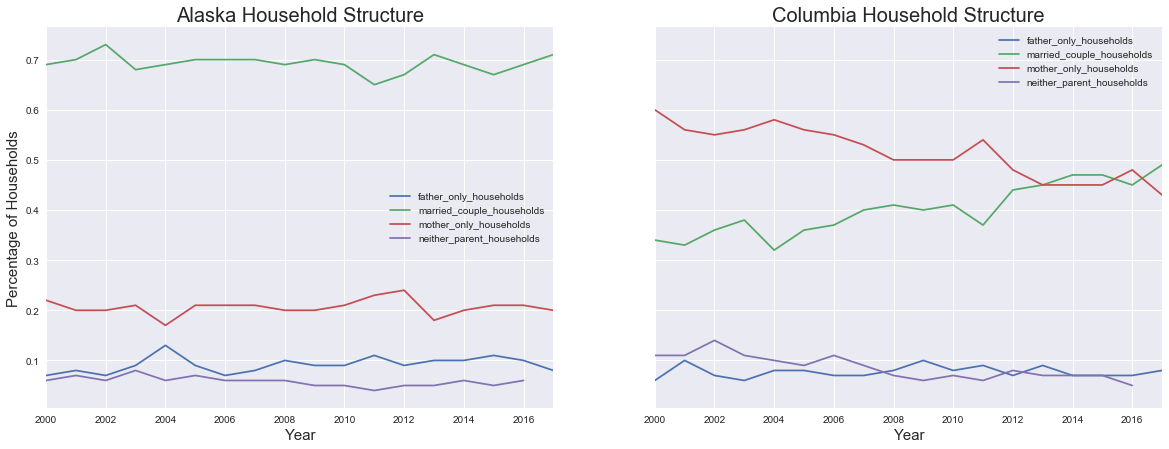

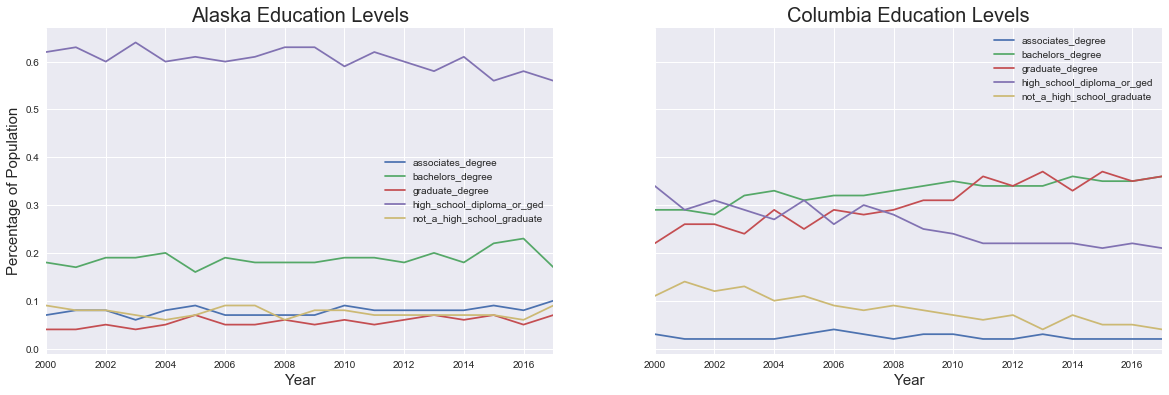

In [45]:
## Plotting graphs to understand the household structure and education level trends in the states of
## Alaska and District of Columbia 

plt.style.use('seaborn')
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

Alaska_household.plot(ax = ax, figsize = (20,7))
ax.set_xlim(2000,2017)
ax.set_title('Alaska Household Structure', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Percentage of Households', fontsize = 15)

Columbia_household.plot(ax = ax2, figsize = (20,7))
ax2.set_xlim(2000,2017)
ax2.set_title('Columbia Household Structure', fontsize = 20)
ax2.set_xlabel('Year', fontsize = 15)
ax2.set_ylabel('Percentage of Households', fontsize = 15)

plt.style.use('seaborn')
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

Alaska_education.plot(ax = ax, figsize = (20,6))
ax.set_xlim(2000,2017)
ax.set_title('Alaska Education Levels', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Percentage of Population', fontsize = 15)

Columbia_education.plot(ax = ax2, figsize = (20,6))
ax2.set_xlim(2000,2017)
ax2.set_title('Columbia Education Levels', fontsize = 20)
ax2.set_xlabel('Year', fontsize = 15)
ax2.set_ylabel('Percentage of Population', fontsize = 15)

One interesting insight from these plots are how in the District of Columbia, married couple households and mother only households have a strong inverse relationship, suggesting that shifts in household structure are largely related to these two structures-- when people aren't married, the children live with the mothers.<br>

It is also interesting how Alaska has such high levels of Associate's degrees. We beleive this suggests that there is a region-specific need or educational opportunities are targetted at attaining this level of education. Similarly, the very low number of Associate's degrees in the District of Columbia suggest that this educational level is not very valuable for the area or possibly that opportunities to achieve this educational level are limited there. 

### Mapping Merge_2015 Data

As an additional tool to understanding the analyses, we also mapped the 2015 pivot table. The manipulated data allows us to have a general overview of the percentage of population within each category we looked at. It does not include Puerto Rico or District of Columbia since the map package Basemap and Plotly were limited to the 50 states. However, because our purpose for mapping is only to see the densities of our manipulated data, it has served its purpose.

### Showing Education Levels in the United States in 2015

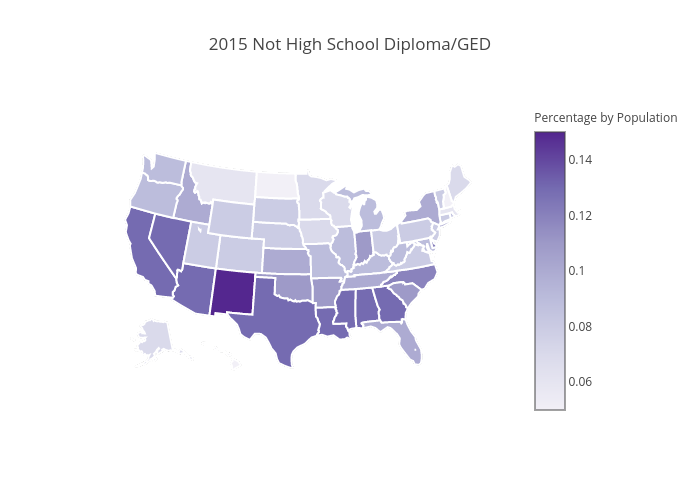

In [12]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/nothighschoolorged-1.png'
Image(url)

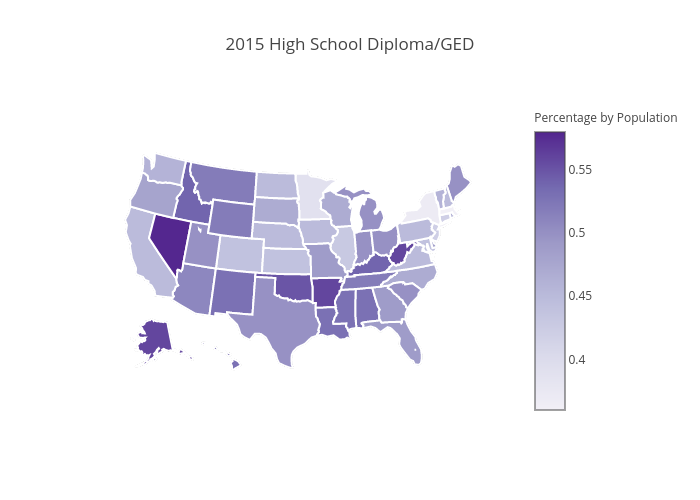

In [6]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/highschoolged.png'
Image(url)

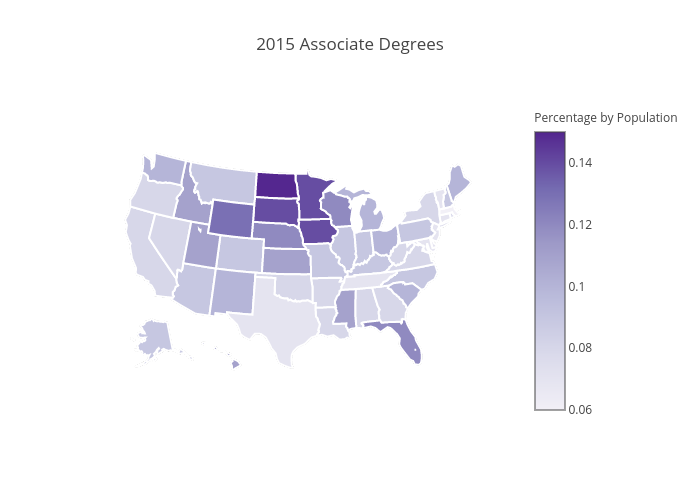

In [1]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/assoc-degree.png'
Image(url)

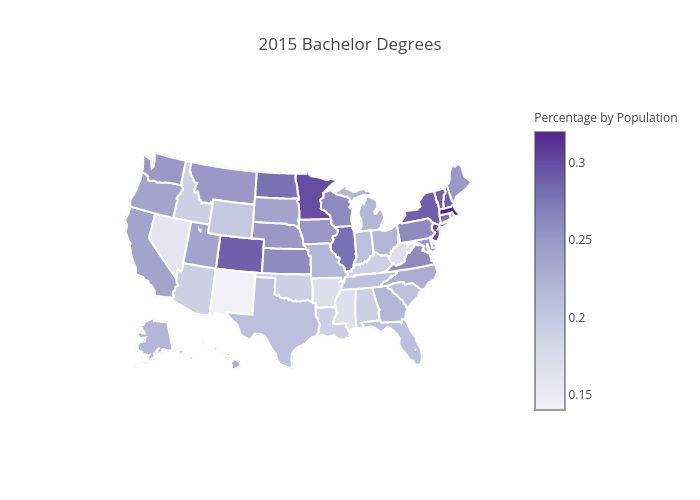

In [2]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/bachelor-degree.png'
Image(url)

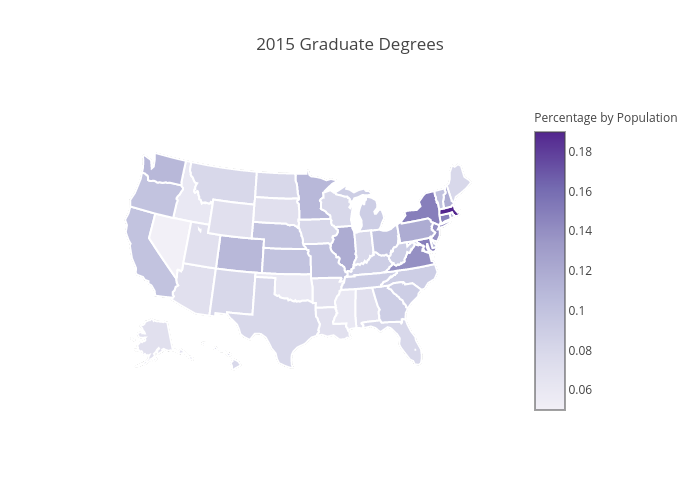

In [5]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/graduate-degree.png'
Image(url)

### Showing Household Structure in the United States in 2015

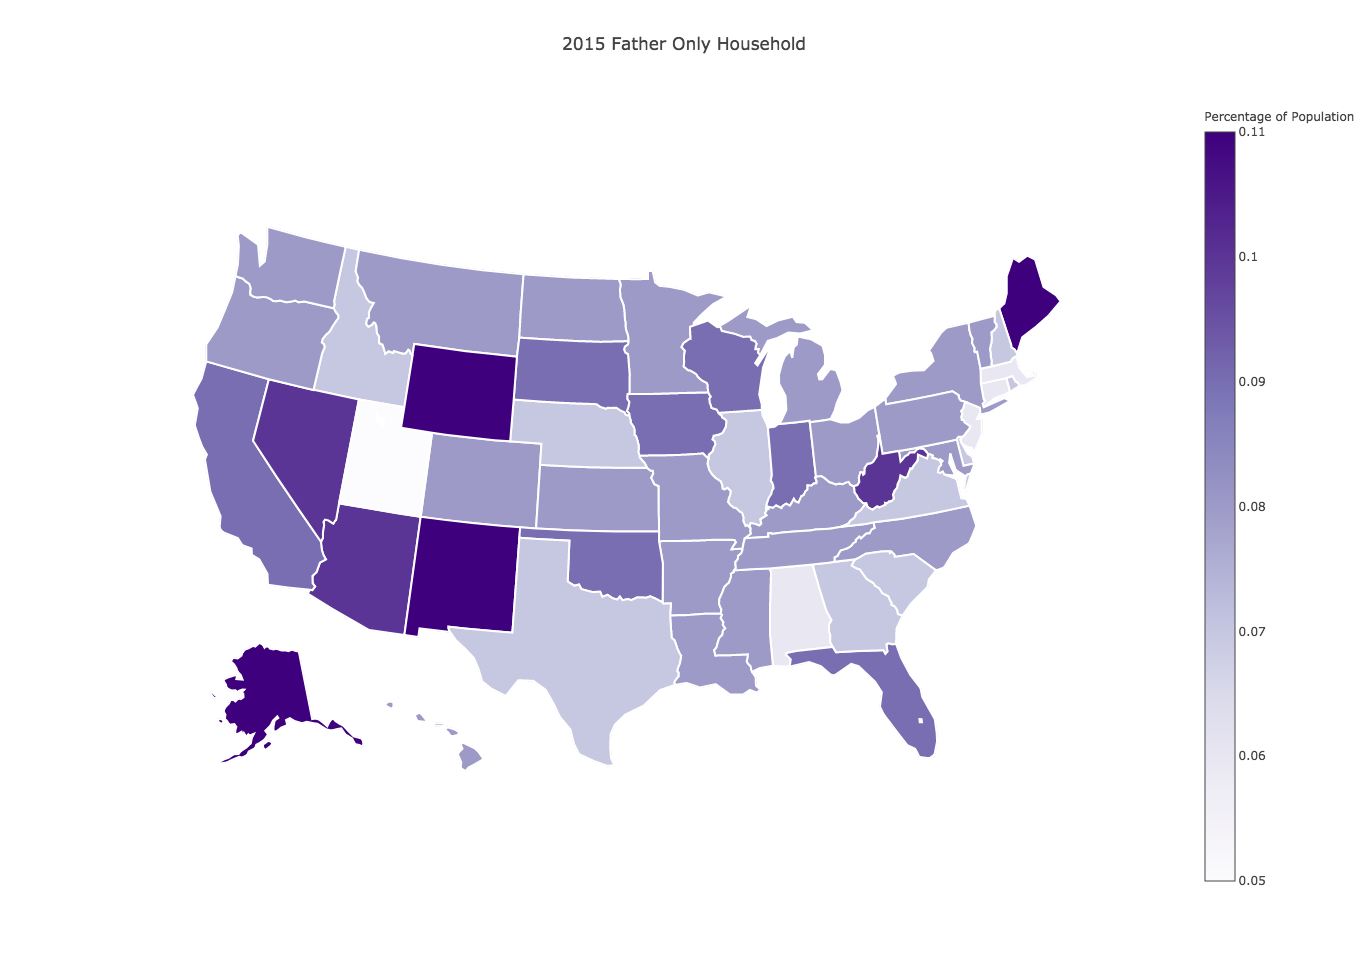

In [4]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/father-only.png'
Image(url)

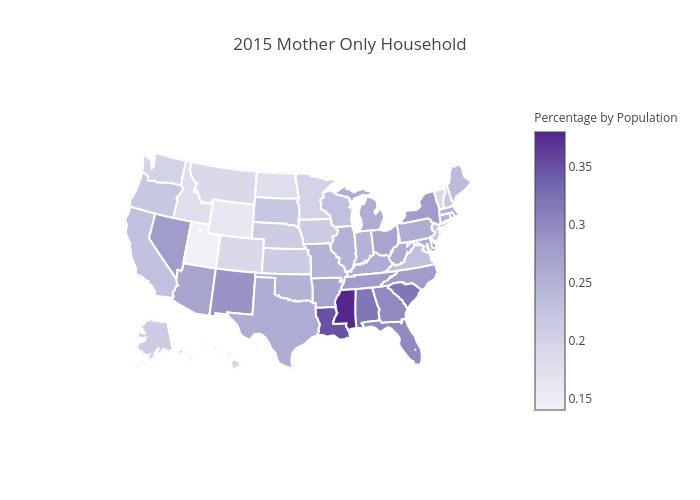

In [8]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/mother-only.png'
Image(url)

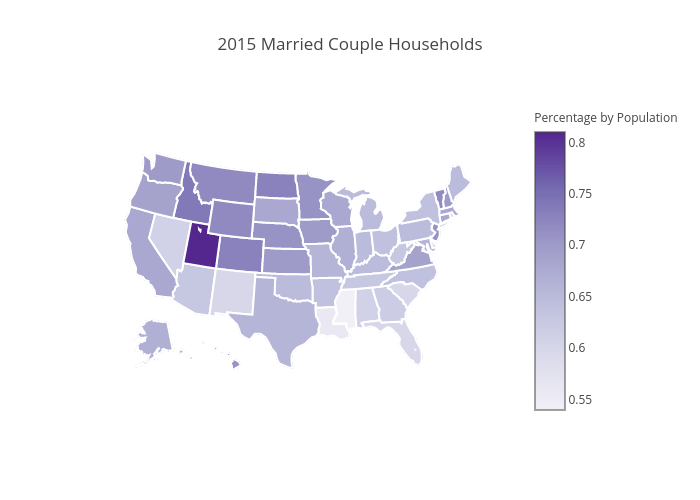

In [7]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/married-couple.png'
Image(url)

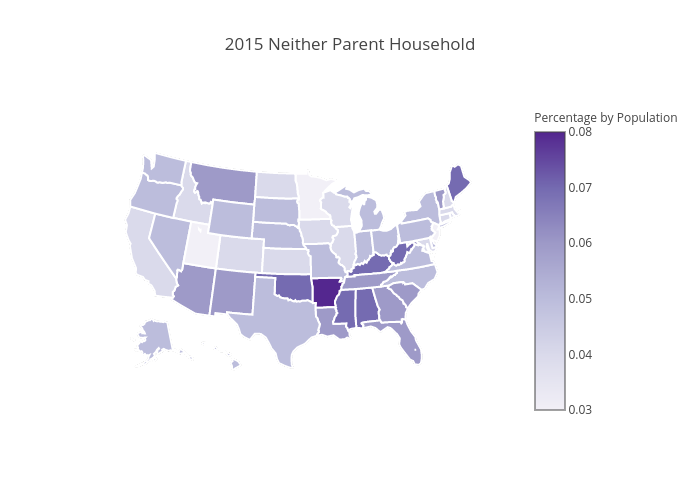

In [9]:
from IPython.display import Image
url = 'https://angelayxng.files.wordpress.com/2018/12/neither-parent.png'
Image(url)

## Conclusion

The goal of this project was to understand whether growing up in a certain kind of household (father only household, mother only household, married couple household and neither parent household) has an effect on the children (who are finishing high school) and young adults’ educational attainment. Specifically, we were interested in finding out whether education attainment levels of children/young adults who grew up in married couple households were higher than of those children/young adults who grew up in single parent or neither parent households because of greater emotional involvement.

We analyzed data from 50 states and District of Columbia and Puerto Rico over a period from 2000-2017. After cleaning our data and regressing percentages of children/young adults with high school diplomas or GEDs on the household structure for the years 2000, 2005, 2010 and 2015, we found that the household structure and child’s education attainment weren’t correlated. To be specific, the coefficients of the dependent variables changed signs. For instance, while the coefficient for father-only household was negative for 2000, it came out to be positive for 2005, 2010 and 2015. Moreover, the coefficients of married couple households fluctuated as it went from negative (2000) to positive (2005 and 2010) and then negative (2015). 

The change in the signs of the coefficients along with the values of R^2 and p values suggest that there are other factors at play influencing levels of higher education beyond household structure. It is possible that factors such as occupations/job potential, incomes, and adverse life events play more significant roles in a child’s potential to graduate high school and pursue college. While household structure is a good predictor of such factors, it is not the whole story.

Finding data on children was extremely challenging due to ethical concerns. We opted instead to use the ACS data, as it was the most comprehensive dataset we could find for the variables we wanted to explore. This data takes the 50 largest cities along with their states (and Puerto Rico and District of Columbia) in a given year based on survey results. The data we pulled covers the years 2000-2017. Based on the longer time frame, we believed the data would accurately portray how children made education choices as they became young adults-- given that they moved from being within households as children on to higher education in this time span. Although the data did not track children individually, we believe that the aggregate data on household structures and the longitudinal horizon for education levels of young adults would be indicative of the effects of household structure on education levels of young adults. One of the obvious drawbacks to this is that we are are not able to track children over time, regarding changes in household structure that occur or direct education levels received by specific children given their household structure.


Since we were not able to find much correlation when we regressed the education level on household structure for all the states, we decided to take another approach. We decided to take 2 states - District of Columbia and Alaska - based on the criteria that these states have the highest and the lowest aggregate percentage of high school graduate young adults (respectively) over 2000-2017 to understand if there were any trends. We thought that when we used a more specific type of regression, rather than an aggregate regression, we may have better and more accurate results. Upon doing so, we found that this was not the best metric, given that it excluded individuals who received educations beyond high school diplomas. By comparing the highest/lowest education level states by degree, the insights were much more interesting. We were able to essentially see which states had the highest percentage of people attain a given degree. While the District of Columbia had the highest percentage of Bachelor’s and Graduate degrees, it had the lowest percentage of High School Diplomas or Associate's Degrees. We interpreted this as possibly meaning that those individuals who are receiving higher educations are choosing to pursue these higher degrees, likely as a result of the employment opportunities made available for them. While North Dakota had the lowest number of non-high school graduates and the highest number of Associate’s Degrees, we argue that it has the highest base-line for education. 


### Sources

https://datacenter.kidscount.org/locations

In [ ]:
# Link to Github
https://github.com/meetali28/Data_Bootcamp_Project